# <div style="text-align: center;">  Підготовка та аналіз даних  </div> #

# <div style="text-align: center;"> _Лабораторна робота №6_ </div> #


## <div style="text-align: right;"> _ФБ-24 Бадрак Іван_ </div> ##


#### <u>**Проста лінійна регресія**</u> - це метод аналізу взаємозв'язку між двома змінними, де одна змінна (незалежна) використовується для передбачення значень іншої (залежної) змінної, припускаючи лінійний зв'язок між ними. ####
#### 1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = k + b) для подальшого аналізу результатів. ####

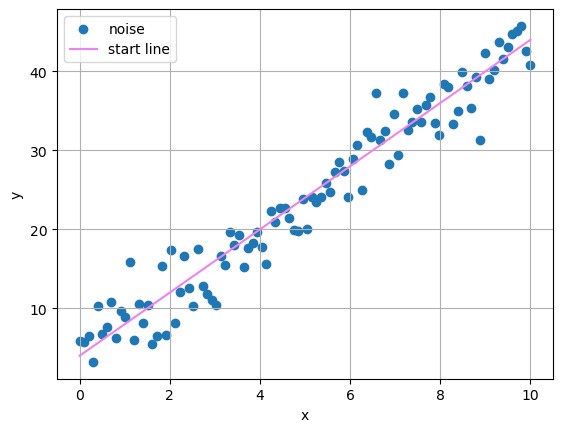

In [189]:
import numpy as np
import matplotlib.pyplot as plt

#наперед задана пряма yy = kk + bb
k = 4
b = 4

#генерація значення xx
x = np.linspace(0, 10, 100)

#прямя yy зі згенерованим шумом
noise = np.random.normal(0, 3, 100)
y = k * x + b + noise

#візуалізація даних
plt.scatter(x, y, label='noise')
plt.plot(x, k * x + b, color='violet', label='start line')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()


#### 2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок.
$$
kk.opti = \frac {n∑(xy)−∑x∑y}{n∑(x^2)-(∑x)^2}
$$
$$
bb.opti = \frac {∑y - kk.opti * ∑x} {n}
$$
​


In [190]:
#метод найменших квадратів
def least_squares(x, y):
    n = len(x)

    k_opti = (n * (x*y).sum() - x.sum() * y.sum()) / (n * (x*x).sum() - x.sum() ** 2)
    b_opti = (y.sum() - k_opti * x.sum()) / n

    return k_opti, b_opti

k_opti, b_opti = least_squares(x, y)

print (k_opti, b_opti)

def error_value(k, b, k_test, b_test):
    k_error = (abs(k - k_test)/k) * 100
    b_error = (abs(b - b_test)/b) * 100
    print(f"Величина абсолютної похибки для коефіцієнту k: {np.abs(k-k_test)}\nВеличина абсолютної похибки для коефіцієнту b: {np.abs(b-b_test)}\nВеличина відносної помилки для коефіцієнту k: {k_error} %\nВеличина відносної помилки для коефіцієнту b: {b_error} %")

error_value(k, b, k_opti, b_opti)

3.9707329946622782 3.8888510340245124
Величина абсолютної похибки для коефіцієнту k: 0.029267005337721752
Величина абсолютної похибки для коефіцієнту b: 0.11114896597548762
Величина відносної помилки для коефіцієнту k: 0.7316751334430438 %
Величина відносної помилки для коефіцієнту b: 2.7787241493871906 %


#### 3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1)

In [191]:
#оцінка за допомогою np.polyfit
k_opti_poly, b_opti_poly = np.polyfit(x, y, 1)
print (k_opti_poly, b_opti_poly)
error_value(k, b, k_opti_poly, b_opti_poly)

3.9707329946622796 3.888851034024517
Величина абсолютної похибки для коефіцієнту k: 0.02926700533772042
Величина абсолютної похибки для коефіцієнту b: 0.11114896597548318
Величина відносної помилки для коефіцієнту k: 0.7316751334430105 %
Величина відносної помилки для коефіцієнту b: 2.7787241493870796 %


#### 4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.

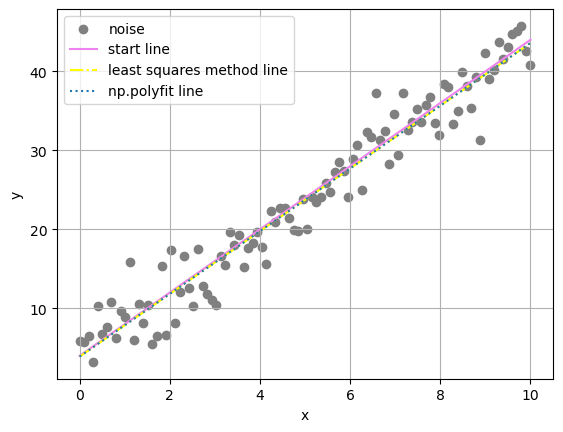

In [192]:
#оцінки лінії регресії на графіку разом з наперед заданою прямою
plt.scatter(x, y, label='noise', color='gray')
plt.plot(x, k * x + b, label='start line', color='violet')
plt.plot(x, k_opti * x + b_opti, label='least squares method line', linestyle='dashdot', color='yellow')
plt.plot(x, k_opti_poly * x + b_opti_poly, label='np.polyfit line', linestyle='dotted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

#### 5. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок.
#### <b><u>Метод градієнтного спуску</u></b>(найшвидшого спуску) – ітеративний метод оптимізації (мінімізації) деякої функції (ми мінімізуємо функцію найменших квадратів). Для знаходження локального мінімуму функції здійснюються кроки, пропорційні протилежному значенню градієнта в поточній точці (початкова точка обирається навмання). Величина кроку (learning rate) – відстань, на яку змінюються параметри кожної ітерації. Деякі формули, що будуть використані в реалізованій функції:

$$
\frac{∂L}{∂β_0} = -2\frac{1}{n}∑(y_i - y.grad)
$$
$$
\frac{∂L}{∂β_1} = -2\frac{1}{n}∑x_i(y_i - y.grad)
$$
$$
β_0^I = β_0^i - learning.rate * \frac{∂L}{∂β_0}, I = (i+1)
$$
$$
β_1^I = β_1^i - learning.rate * \frac{∂L}{∂β_1}, I = (i+1)
$$

In [193]:
#функція, що реалізує метод градієнтного спуску
def grad_descent(x, y, learning_rate, n_iter):
    #ініціалізація початкових значень
    n = len(x)
    k_opti = 0
    b_opti = 0

    for i in range(n_iter):
        #поточні прогнози
        y_grad = k_opti * x + b_opti
        #обчисленя часткових похідних
        k_grad = (-2 / n) * ((x * (y - y_grad)).sum())
        b_grad = (-2 / n) * ((y - y_grad).sum())
        #оновлення параметрів
        k_opti -= learning_rate * k_grad
        b_opti -= learning_rate * b_grad

    return k_opti, b_opti

learning_rate = 0.01
n_iter = 1000

k_grad, b_grad = grad_descent(x, y, learning_rate, n_iter)
print (k_grad, b_grad)

error_value(k, b, k_grad, b_grad)

3.9740723302995966 3.866642124909209
Величина абсолютної похибки для коефіцієнту k: 0.02592766970040339
Величина абсолютної похибки для коефіцієнту b: 0.1333578750907911
Величина відносної помилки для коефіцієнту k: 0.6481917425100847 %
Величина відносної помилки для коефіцієнту b: 3.333946877269778 %


#### 6. Додайте отриману лінію регресії на загальний графік

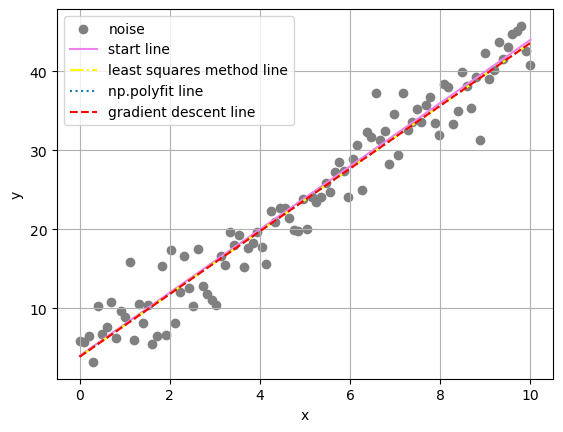

In [194]:
plt.scatter(x, y, label='noise', color='gray')
plt.plot(x, k * x + b, label='start line', color='violet')
plt.plot(x, k_opti * x + b_opti, label='least squares method line', linestyle='dashdot', color='yellow')
plt.plot(x, k_opti_poly * x + b_opti_poly, label='np.polyfit line', linestyle='dotted')
plt.plot(x, k_grad * x + b_grad, label='gradient descent line', linestyle='dashed', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

#### 6. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

Остання похибка: 7.8812967082576355
Кількість ітерацій: 792


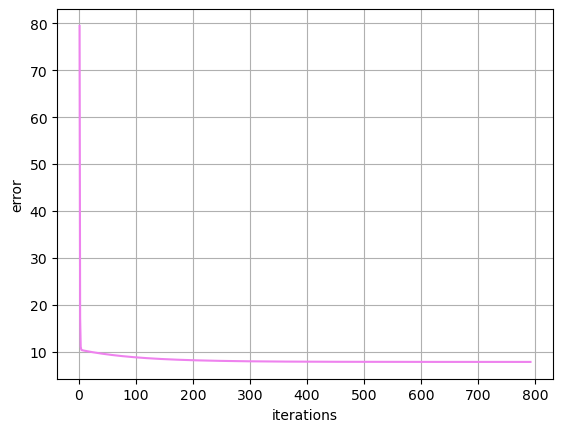

In [195]:
#середньоквадратична помилка
def grad_loss(x, y, k, b):
    y_grad = k * x + b
    return np.mean((y_grad - y) ** 2)

#похибка від кількості ітерацій
errors = []
prev_error = 0
iter = []
for i in range(1, n_iter + 1):
    k_grad, b_grad = grad_descent(x, y, learning_rate, i)
    error = grad_loss(x, y, k_grad, b_grad)
    errors.append(error)
    iter.append(i)

    if np.abs(error - prev_error) < 1e-5:
        break

    prev_error = error

print(f"Остання похибка: {errors[-1]}")
print(f"Кількість ітерацій: {i}")

#графік залежності похибки від кількості ітерацій
plt.plot(iter, errors, color='violet')
plt.xlabel('iterations')
plt.ylabel('error')
plt.grid()
plt.show()

#### 8. Порівняйте отримані результати з результатами попереднього завдання

In [196]:
print (f'Всі результати для порівняння:\nПочаткове значення : k={k}, b={b}')
print (f'Метод найменших квадратів: k={k_opti}, b={b_opti}')
error_value(k, b, k_opti, b_opti)
print (f'Оцінка за допомогою np.polyfit(x,y,1): k={k_opti_poly}, b={b_opti_poly}')
error_value(k, b, k_opti_poly, b_opti_poly)
print (f'Оптимальні оцінки за допомогою методу градієнтного спуску: k={k_grad}, b={b_grad}')
error_value(k, b, k_grad, b_grad)


Всі результати для порівняння:
Початкове значення : k=4, b=4
Метод найменших квадратів: k=3.9707329946622782, b=3.8888510340245124
Величина абсолютної похибки для коефіцієнту k: 0.029267005337721752
Величина абсолютної похибки для коефіцієнту b: 0.11114896597548762
Величина відносної помилки для коефіцієнту k: 0.7316751334430438 %
Величина відносної помилки для коефіцієнту b: 2.7787241493871906 %
Оцінка за допомогою np.polyfit(x,y,1): k=3.9707329946622796, b=3.888851034024517
Величина абсолютної похибки для коефіцієнту k: 0.02926700533772042
Величина абсолютної похибки для коефіцієнту b: 0.11114896597548318
Величина відносної помилки для коефіцієнту k: 0.7316751334430105 %
Величина відносної помилки для коефіцієнту b: 2.7787241493870796 %
Оптимальні оцінки за допомогою методу градієнтного спуску: k=3.980134325516853, b=3.826325632211406
Величина абсолютної похибки для коефіцієнту k: 0.01986567448314691
Величина абсолютної похибки для коефіцієнту b: 0.1736743677885939
Величина відносної